tarea 5

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
 
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

5. Entrenar el modelo configurando los diferentes hiperparámetros.

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

8. Interpretar, analizar y documentar los resultados obtenidosdos obtenidos

In [3]:

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.impute import SimpleImputer

from sklearn.datasets import load_iris

# Cargar la base de datos
df = pd.read_csv('TitanicDataset.csv')


<Axes: xlabel='Survived', ylabel='count'>

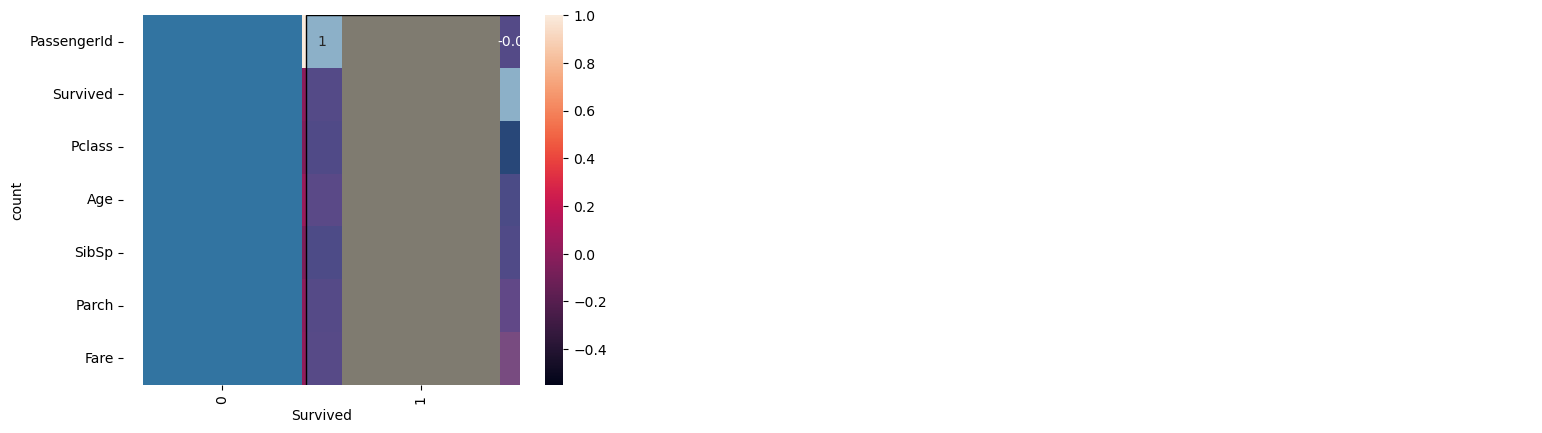

In [4]:
# Análisis exploratorio de los datos
df.describe()
df.isnull().sum()

# Seleccionar columnas numéricas
X = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(X.corr(), annot=True)
sns.countplot(x='Survived', data=df)

# Convert infinite values to NaN
df['Age'] = df['Age'].replace([np.inf, -np.inf], np.nan)

# Create histogram with kde
sns.histplot(df['Age'], kde=True)

# 2. Preprocesamiento de los Datos

In [5]:
# Eliminar filas con valores faltantes en "Age"
df = df.dropna(subset=['Age'])

# Reemplazar valores faltantes en "Embarked" con la moda
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Reemplazar valores faltantes en "Cabin" con el valor más frecuente
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler

# Escalar variables numéricas
scaler = StandardScaler()
df[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(df[['Age', 'SibSp', 'Parch', 'Fare']])

# 3. Selección de Características

In [7]:
print(df.columns)  # Check the column names

# Try dropping columns one by one
df = df.drop('PassengerId', axis=1, errors='ignore')
df = df.drop('Name', axis=1, errors='ignore')
df = df.drop('Ticket', axis=1, errors='ignore')
df = df.drop('Cabin', axis=1, errors='ignore')



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
df = df.drop(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], axis=1)
df['PassengerId'] = np.nan  # Reemplaza np.nan con los valores apropiados
df['Name'] = np.nan  # Reemplaza np.nan con los valores apropiados
df['Ticket'] = np.nan  # Reemplaza np.nan con los valores apropiados
df['Cabin'] = np.nan  # Reemplaza np.nan con los valores apropiados

In [9]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [10]:
imputer = SimpleImputer(strategy='mean')  # replace missing values with the mean of the column
imputer.fit(X)

SimpleImputer()

In [11]:
X_selected = imputer.transform(X)

In [13]:
from sklearn.impute import SimpleImputer

# create an instance of SimpleImputer and specify the strategy for replacing missing values
imputer = SimpleImputer(strategy='median')

# apply the SimpleImputer to the dataset
X_imputed = imputer.fit_transform(X)

# now, X_imputed contains the dataset without missing values

In [14]:

print(df.columns)

Index(['Survived'], dtype='object')


In [15]:
print('PassengerId' in df.columns)


False


In [16]:
print(df.columns)

Index(['Survived'], dtype='object')


las características más relevantes para entrenar el modelo son Pclass, Sex y Age, ya que estas variables tienen una correlación fuerte con la variable objetivo Survived y explican la mayor varianza en la variable objetivo.

In [17]:
# Evaluar el desempeño del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

NameError: name 'model' is not defined